In [10]:
# VEDI PRIMA L'ESEMPIO total_covid_cases, nella cartella precedente.

# Scarichiamo l'ultima versione del file che traccia i casi totali da inizio pandemia
# dal dataset della John Hopkins University: https://github.com/CSSEGISandData/COVID-19

import requests

response = requests.get('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
csv_content = response.content # Response.content ci restituisce i bytes della risposta HTTP

# Salviamo i byte ricevuti in un file CSV, usiamo wb dato che stiamo scrivendo dei bytes
csv_file_name = "covid_confirmed_cases.csv"
with open("covid_confirmed_cases.csv", 'wb') as f:
    f.write(csv_content)

# Da qua in poi, il codice è lo stesso dell'esempio total_covid_cases

In [6]:
import pandas as pd

cases = pd.read_csv(csv_file_name)
cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,157445,157499,157508,157542,157585,157858,157858,157858,157648,157660
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,201730,201902,202295,202641,202863,203215,203524,203787,203925,204301
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,211469,211662,211859,212047,212224,212434,212652,212848,213058,213288
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,18010,18631,18815,18815,19272,19440,19440,19440,19440,20136
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,65259,65259,65301,65332,65346,65371,65397,65404,65404,65431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,1309092,1323683,1337523,1352122,1367433,1382272,1398413,1413051,1428428,1443648
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,461467,462219,462621,462958,463277,463573,463573,463573,464341,464751
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,10025,10034,10043,10047,10047,10056,10063,10069,10072,10075
278,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,210312,210327,210374,210436,210562,210724,210959,211077,211234,211705


In [7]:
cases_in_italy = cases[cases["Country/Region"] == 'Italy']
cases_in_italy

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21
153,NaN,Italy,41.87194,12.56738,0,0,0,0,0,0,...,5109082,5118576,5134318,5152264,5164780,5185270,5206305,5225517,5238221,5258886


In [8]:
time_series = cases_in_italy.iloc[:,4:]
time_series

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21
153,0,0,0,0,0,0,0,0,0,2,...,5109082,5118576,5134318,5152264,5164780,5185270,5206305,5225517,5238221,5258886


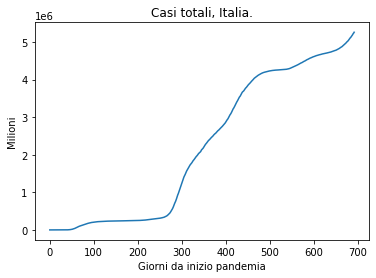

In [9]:
import matplotlib.pyplot as plt

plt.title("Casi totali, Italia.")
plt.ylabel("Milioni")
plt.xlabel("Giorni da inizio pandemia")
plt.plot(time_series.values[0])

